## Importing Modules and Dataset

In [827]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [828]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [829]:
# Inspects the first 5 observations of our dataset
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [830]:
# Gets a summary of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [831]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Fixing the datetime column

In [832]:
train["date"] = pd.to_datetime(train['datetime']).dt.date
train["time"] = pd.to_datetime(train["datetime"]).dt.hour
train["day"] = pd.to_datetime(train["datetime"]).dt.day_name()
train['day'] = pd.Categorical(train['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
train["month"] = pd.to_datetime(train["datetime"]).dt.month
train["year"] = pd.to_datetime(train["datetime"]).dt.year
train = train.drop(['datetime'], axis = 1)

In [833]:
test["date"] = pd.to_datetime(test['datetime']).dt.date
test["time"] = pd.to_datetime(test["datetime"]).dt.hour
test["day"] = pd.to_datetime(test["datetime"]).dt.day_name()
test['day'] = pd.Categorical(test['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
test["month"] = pd.to_datetime(test["datetime"]).dt.month
test["year"] = pd.to_datetime(test["datetime"]).dt.year
test = test.drop(['datetime'], axis = 1)

In [834]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,12.000000,2012.000000


### Analysing Missing Values

In [835]:
train.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
time          0
day           0
month         0
year          0
dtype: int64

In [836]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,Saturday,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,Saturday,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,Saturday,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,Saturday,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,Saturday,1,2011


## Exploratory Data Analysis

We split our attributes(features) of our dataset into three categories: 
- Our target variable, `count`
- Our categorical variables: `season`, `holiday`, `workingday`, `weather`, `year`
- Our numerical(continuous variables): `temp`, `atemp`, `humidity`, `windspeed`, `casual`, `registered`, `day`, `month`. 

### Our Target Variable

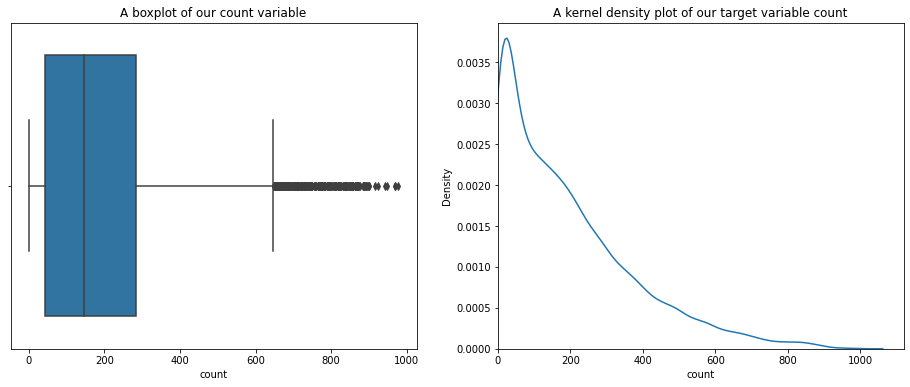

In [837]:
plt.figure(figsize = (16,6))
plt.subplot(1, 2, 1)
sns.boxplot(data = train, x = 'count')
plt.title("A boxplot of our count variable")
plt.subplot(1, 2, 2)
sns.kdeplot(data = train, x = 'count').set(xlim = (-0.1, None))
plt.title("A kernel density plot of our target variable count")
plt.show()

### Our categorical variables

In [838]:
categorical = ["season", "holiday", "workingday", "weather", "day", "month", "year"]
value_counts = {}
for element in categorical: 
    value_counts[element] = train[element].value_counts() /len(train["holiday"])
    value_counts[element] = value_counts[element].rename_axis(element).reset_index(name = "counts")

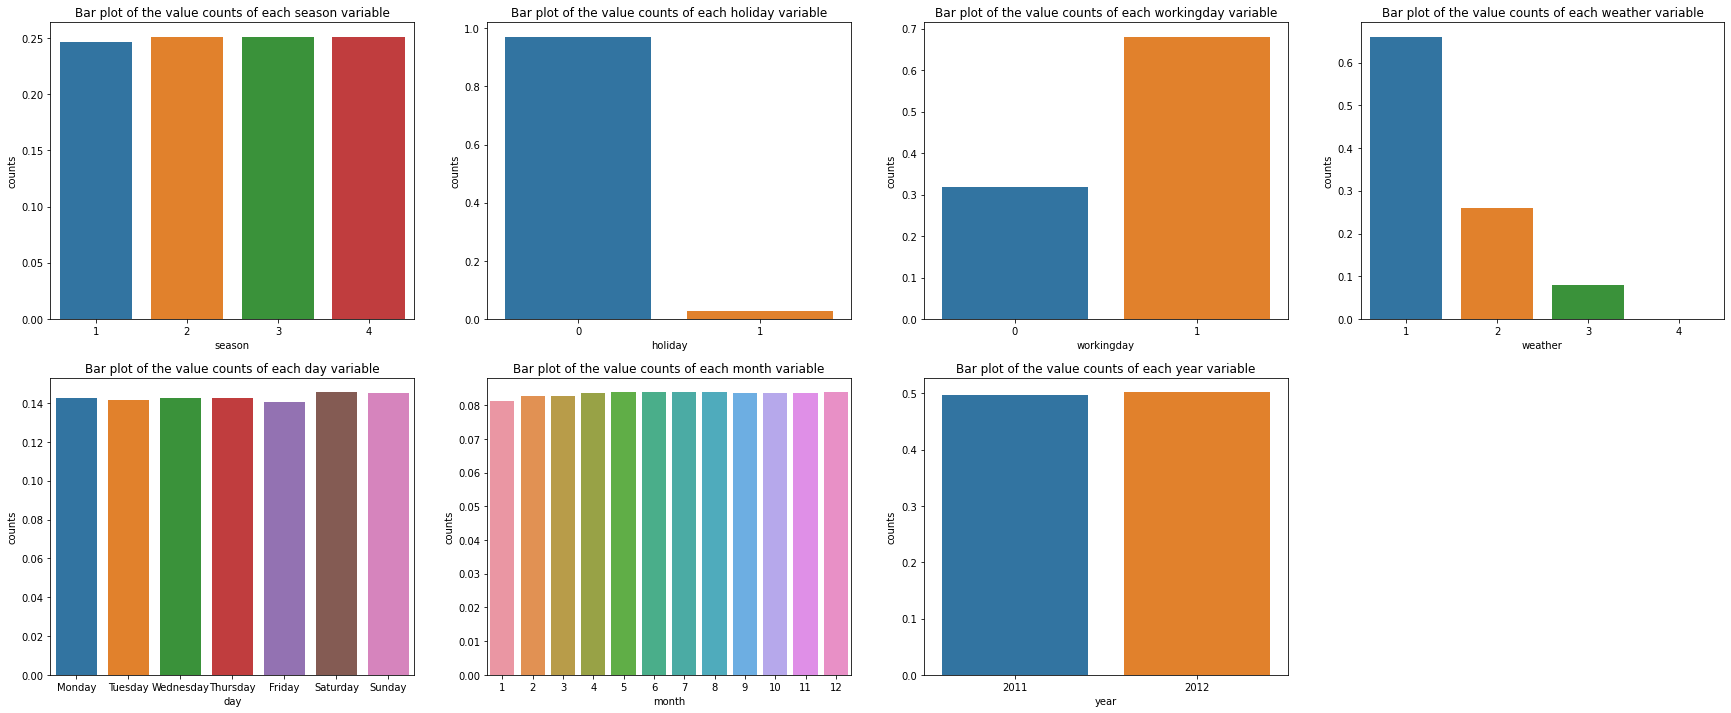

In [839]:
plt.figure(figsize = (30,12))
counter = 1
for element in categorical: 
    plt.subplot(2, 4, counter)
    sns.barplot(data = value_counts[element], x = element, y = "counts")
    plt.title(f"Bar plot of the value counts of each {element} variable")
    counter += 1

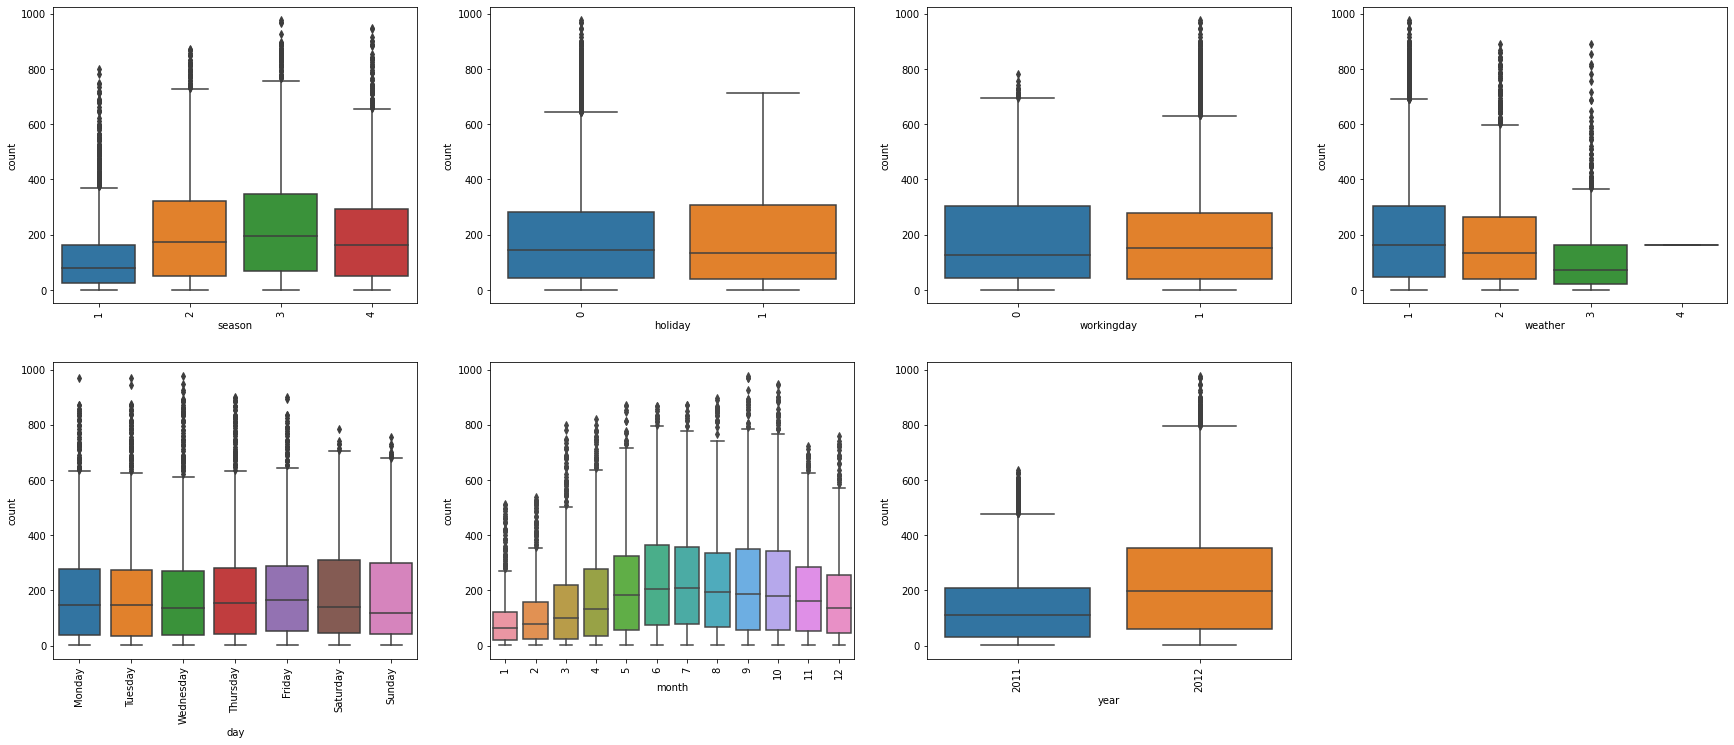

In [840]:
plt.figure(figsize = (30,12))
counter = 1
for element in categorical: 
    plt.subplot(2, 4, counter)
    sns.boxplot(x = train[element], y = train['count']).tick_params(axis = 'x', rotation = 90)
    counter += 1

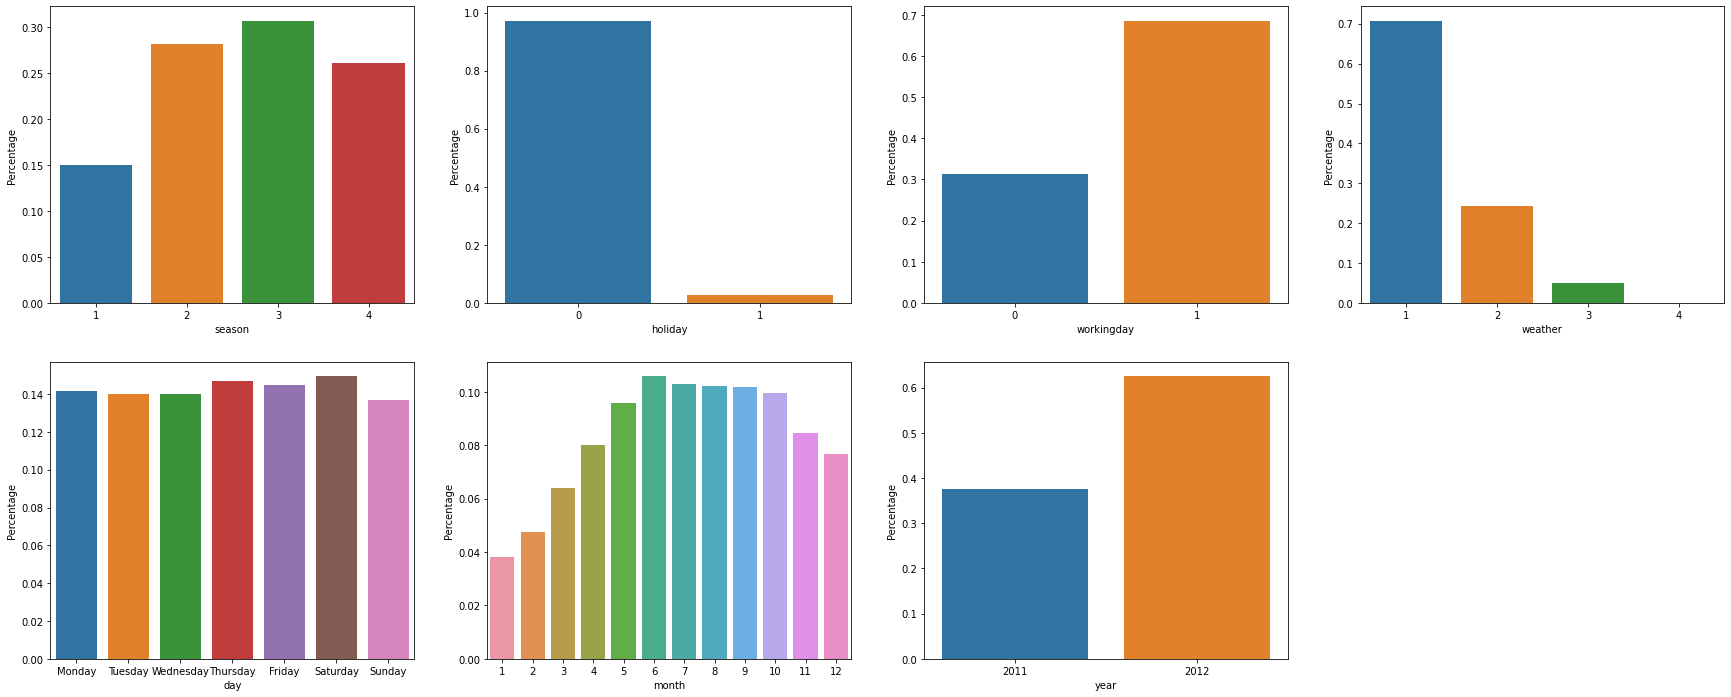

In [841]:
plt.figure(figsize = (30,12))
counter = 1
train_groupby_values = {}
for element in categorical: 
    plt.subplot(2, 4, counter)
    train_groupby_values[element] = (train.groupby([element]).sum()['count']/sum(train['count'])).reset_index(name = "Percentage")
    sns.barplot(data = train_groupby_values[element], x = element, y = "Percentage")
    counter += 1

### Our numeric variables

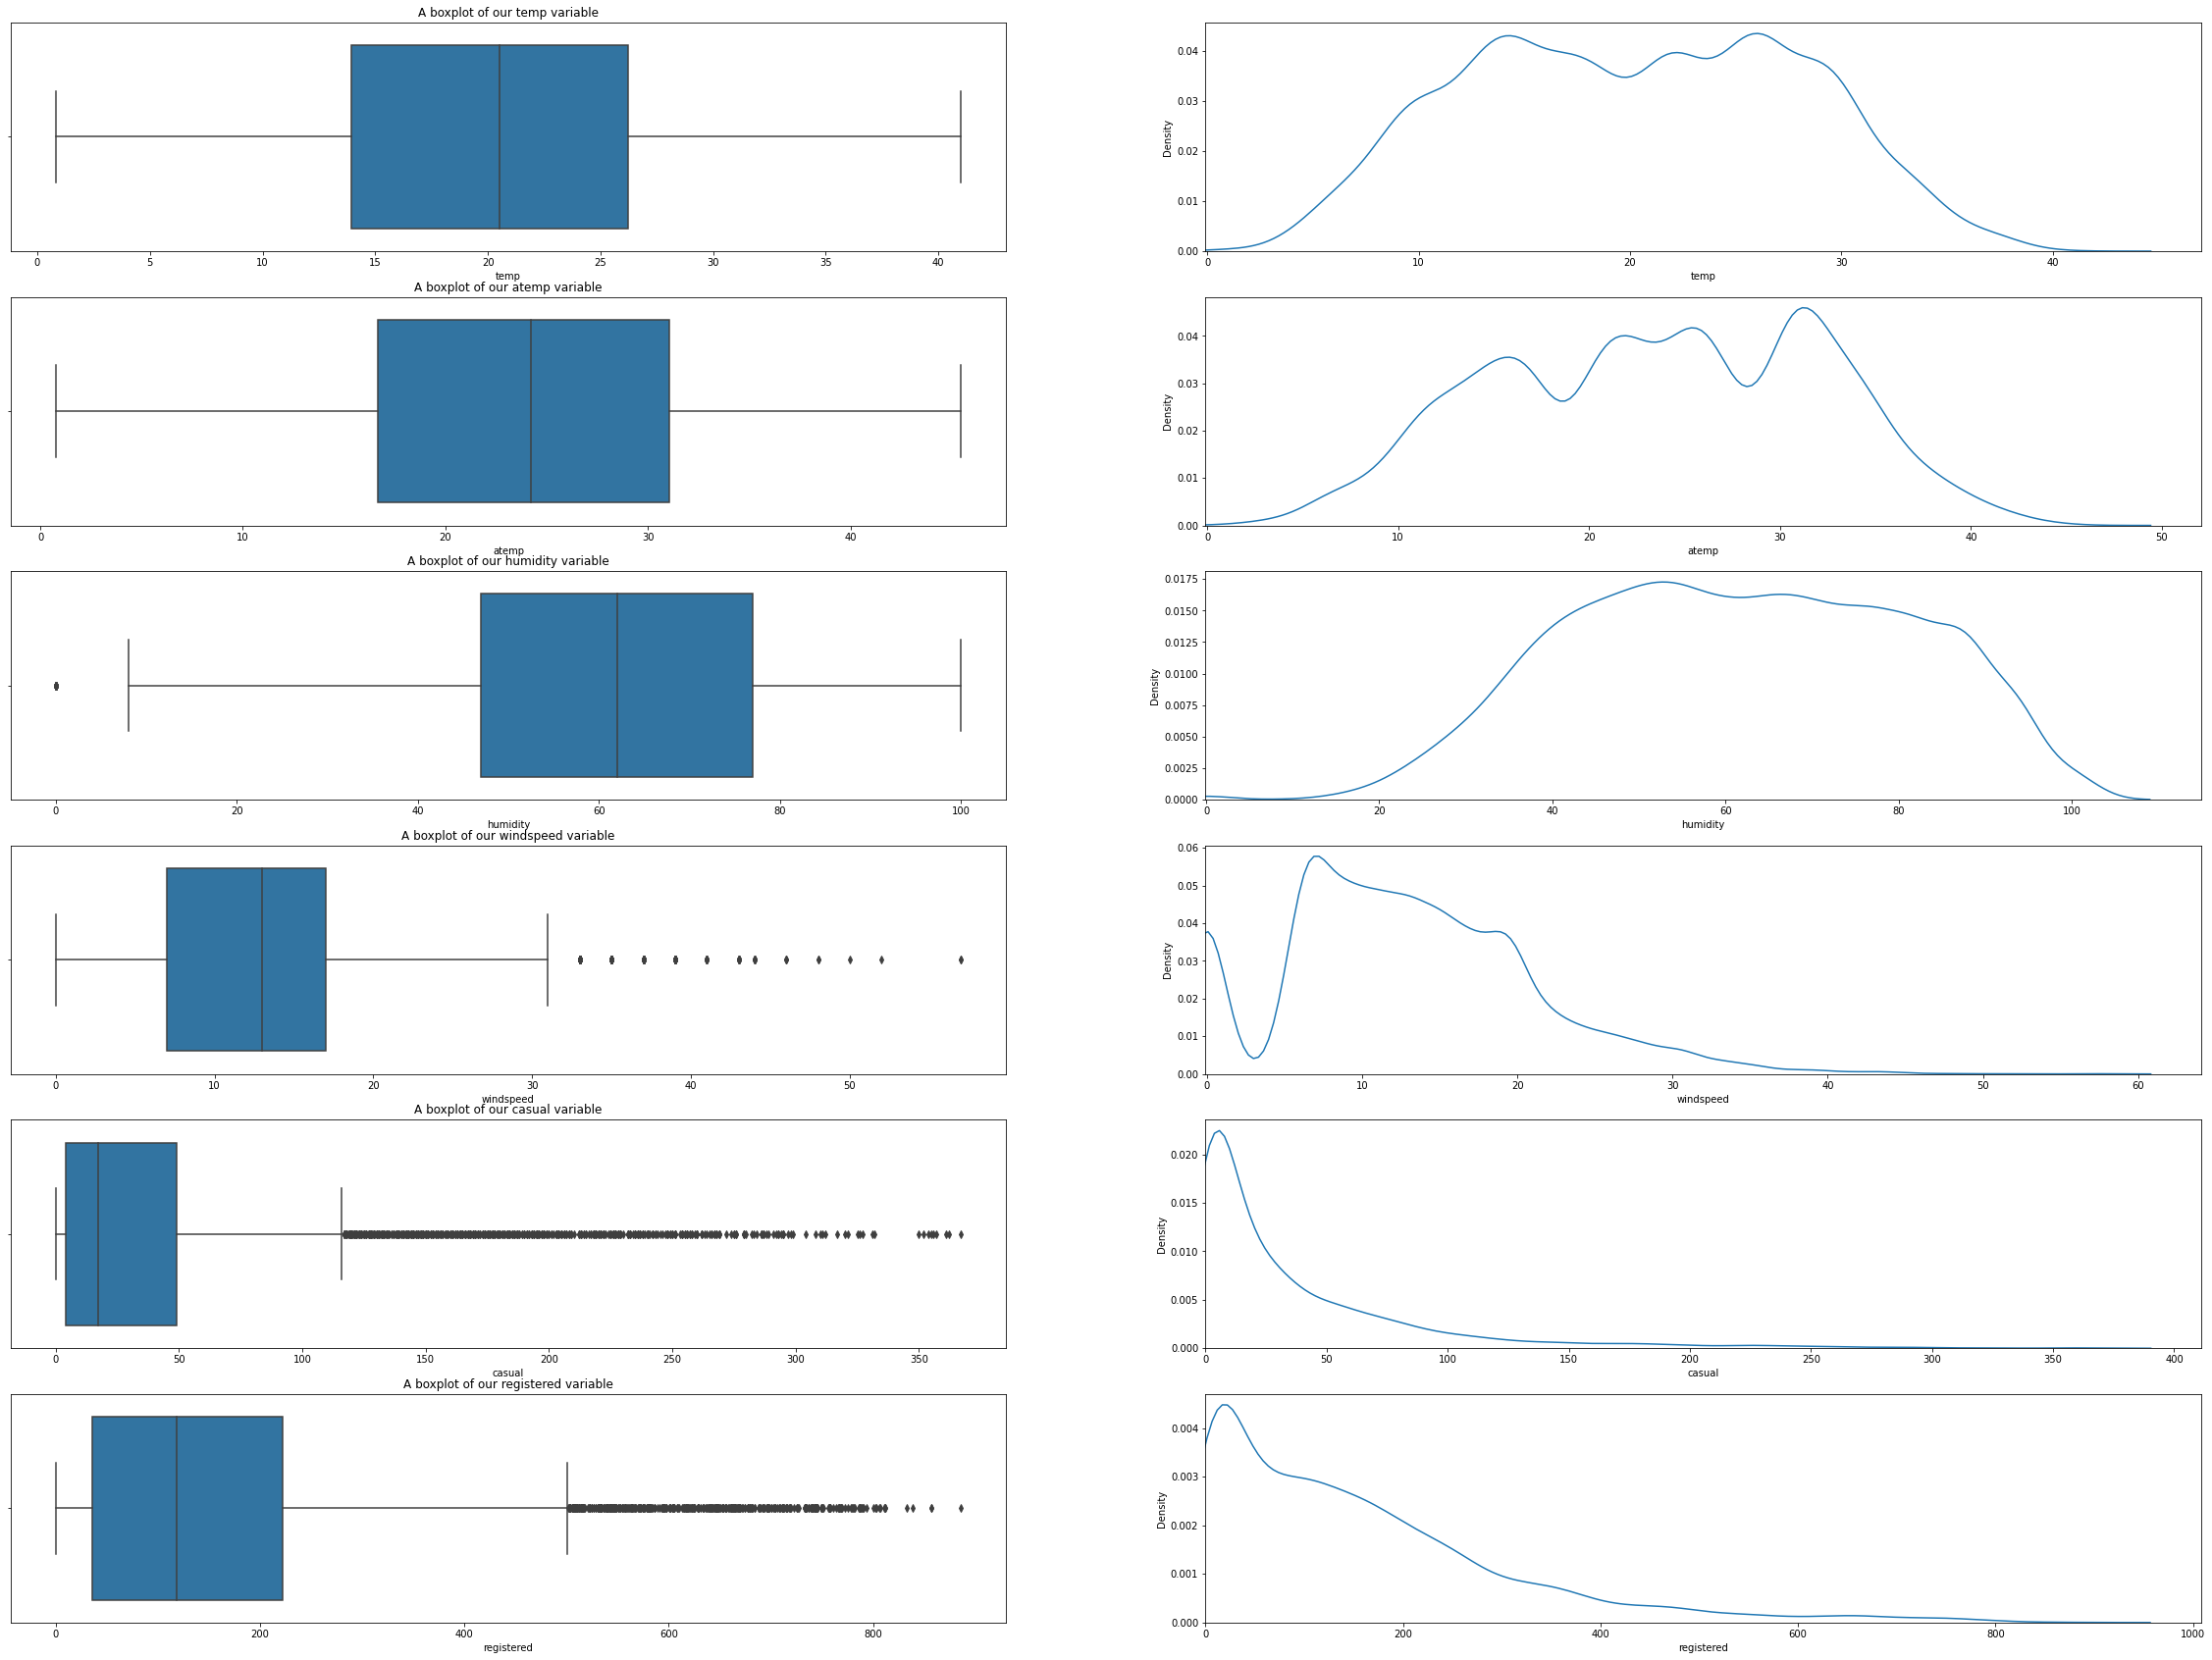

In [842]:
numerical = ["temp", "atemp", "humidity", "windspeed", "casual", "registered"]
plt.figure(figsize = (40, 30))
counter = 1
for element in numerical: 
    plt.subplot(6, 2, counter)
    sns.boxplot(data = train, x = element)
    plt.title(f"A boxplot of our {element} variable")
    plt.subplot(6, 2, counter + 1)
    sns.kdeplot(data = train, x = element).set(xlim = (-0.1, None))
    counter += 2

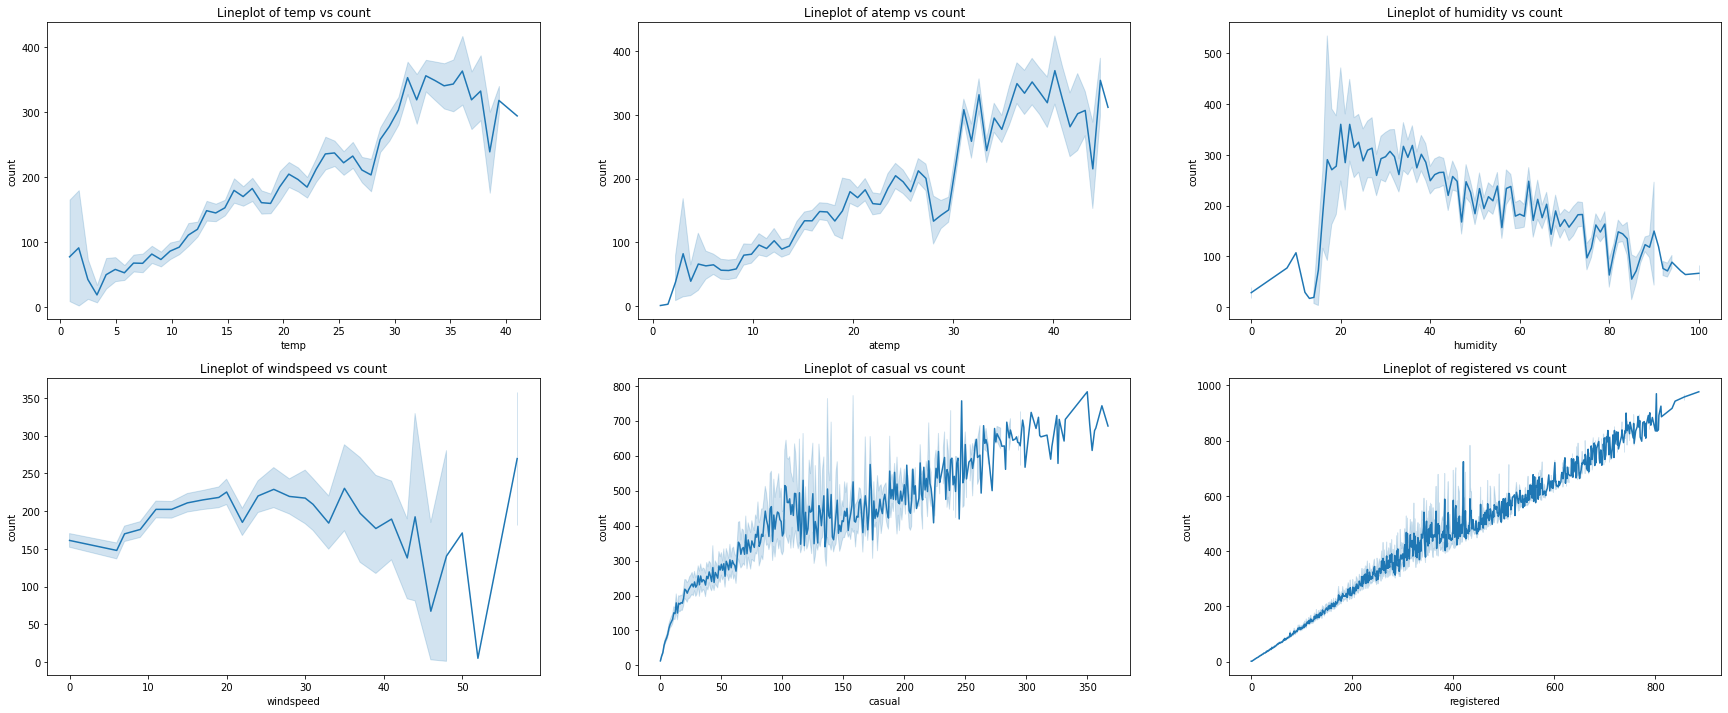

In [843]:
plt.figure(figsize = (30,12))
counter = 1
for element in numerical: 
    plt.subplot(2, 3, counter)
    sns.lineplot(x = train[element], y = train['count'])
    plt.title(f"Lineplot of {element} vs count")
    counter += 1
plt.show()

**Some Observations**
- As atemp/temp increases so too does the number of users at a given time of day. As expected, this suggests more people use bikes during summer or in the middle of the year as seen in the boxplot (categorical element vs count)
- Ignoring outliers, as humiditiy, less people would hire the bike at a given time of day. 
- The number of casual/registered users seem to correlated with the total count of a given day. 


In [844]:
train[train['year'] == 2012]['temp'].describe()

count    5464.000000
mean       20.706051
std         7.600352
min         0.820000
25%        14.760000
50%        21.320000
75%        27.060000
max        41.000000
Name: temp, dtype: float64

In [845]:
train[train['year'] == 2011]['temp'].describe()

count    5422.000000
mean       19.751988
std         7.951694
min         2.460000
25%        13.120000
50%        19.680000
75%        26.240000
max        38.540000
Name: temp, dtype: float64

### Our weather variables

In [846]:
weather_variables = ['temp', 'atemp', 'humidity', 'windspeed']
hues = ['season', 'year', 'month', 'weather']

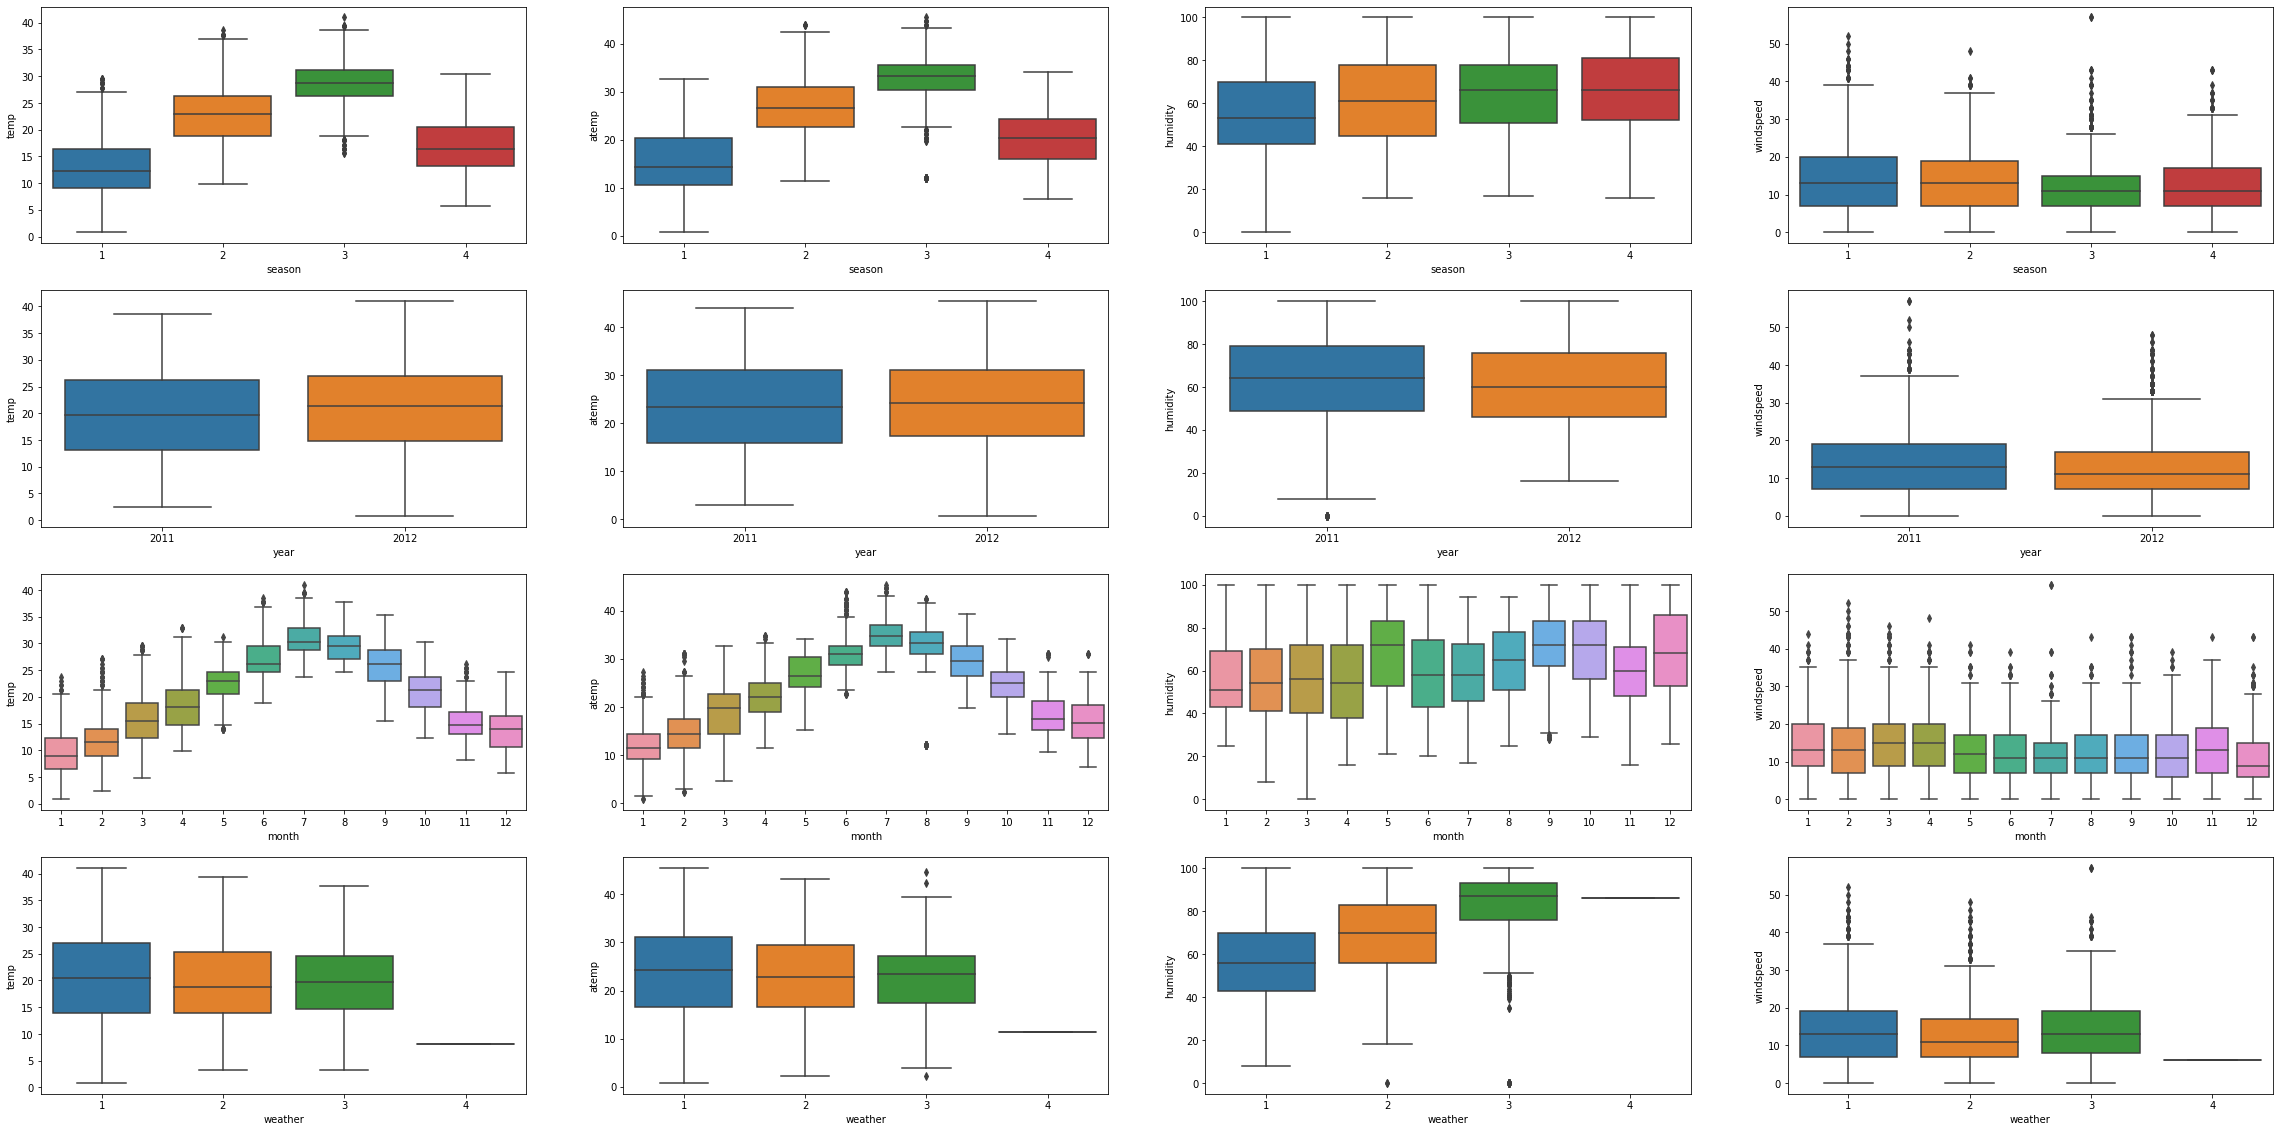

In [847]:
plt.figure(figsize = (40, 20))
counter = 1
for hue in hues: 
    for element in weather_variables: 
        plt.subplot(4, 4, counter)
        sns.boxplot(x = train[hue], y = train[element])
        counter += 1

**Observations**
- As expected, boxplot distribution of windspeed is roughly uniform for all three hues (season, year, weather). 
- We can see that the main factor that influences weather patterns was the humidity. 
- We can also see that there is a unique temperature range for each of our 4 weather seasons. This explains why the winter seasons (lower temperatures) have lower counts and summer seasons (higher temperatures) have higher counts. 
- As one would expect, there is a clear correlation between temperature and month. Thus the months with higher temperatures on average have more riders on it.
- We cannot determine any change in weather conditions through the box plot in our year variable. So we will plot a kdeplot of the weather conditions and year.  

In [848]:
current_palette = sns.color_palette("Set2")

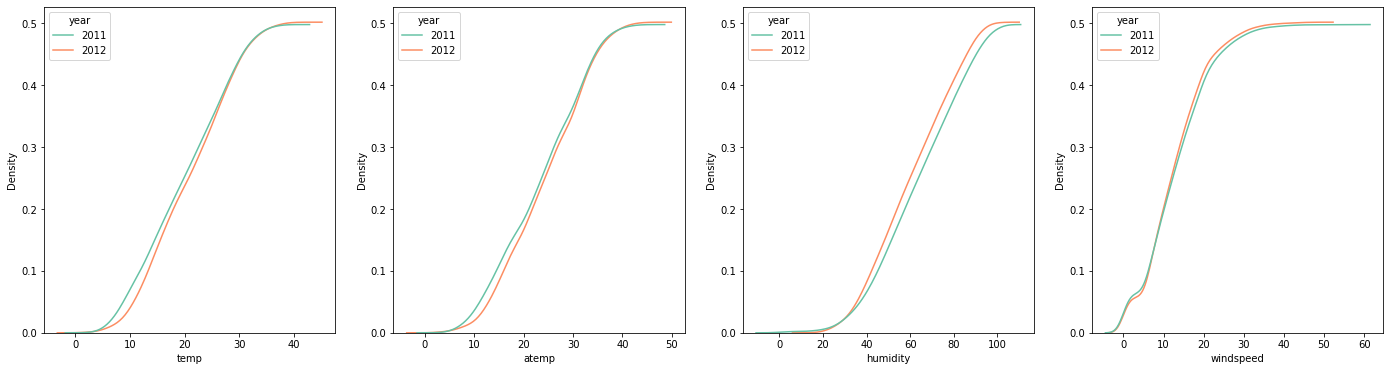

In [849]:
plt.figure(figsize = (24, 6))
counter = 1
for element in weather_variables: 
    plt.subplot(1, 4, counter)
    sns.kdeplot(x= train[element], hue = train['year'], cumulative = True, palette=current_palette[:2])
    counter += 1

**Observations:**
We can see that: 
- There were more days that were less humid in 2012 than 2011. 
- There were more days that were warmer in 2012 than 2011. 
The weather conditions look like a significant factor in explaining the uptick of ridership from 2011 to 2012.

### Humidity drops when temperatures are more than 28 degrees

<AxesSubplot:xlabel='temp', ylabel='humidity'>

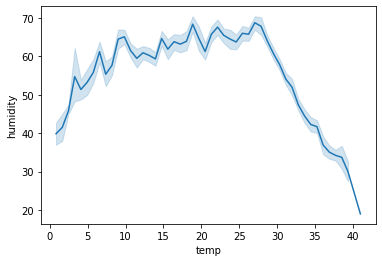

In [850]:
sns.lineplot(x = train['temp'], y = train['humidity'])




In [851]:
date_count

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
date,,,,,,,,,,,,,
2011-01-01,24,0,0,38,338.66,436.350,1934,257.9969,331,654,985,24,48264
2011-01-02,23,0,0,45,342.76,406.800,1601,382.9988,131,670,801,23,46253
2011-01-03,22,0,22,22,177.12,208.345,962,366.0076,120,1229,1349,22,44242
2011-01-04,23,0,23,24,188.60,243.940,1358,247.0156,108,1454,1562,23,46253
2011-01-05,23,0,23,23,214.02,263.660,1005,288.0129,82,1518,1600,23,46253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,96,0,0,33,318.98,406.060,1561,171.0108,767,4280,5047,288,48288
2012-12-16,96,0,0,49,356.70,443.925,2013,161.9926,538,3248,3786,288,48288
2012-12-17,96,0,24,51,387.04,481.800,2177,157.9994,212,4373,4585,288,48288


<AxesSubplot:xlabel='month', ylabel='temp'>

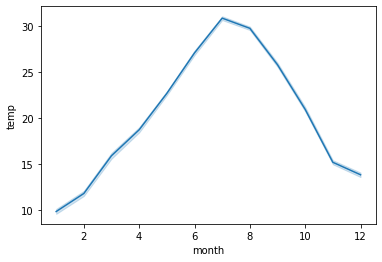

In [852]:
sns.lineplot(data = train, x = "month", y = "temp")

### Feature SelectiON

In [922]:
corr = train.corr()

In [867]:
dataset = [train, test]

In [879]:
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
for element in dataset: 
    element["day_no"] = element["day"].map(day_map)
train = train.drop(['day', 'date'], axis = 1)
test = test.drop(['day', 'date'], axis = 1)

KeyError: 'day'

In [880]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [881]:
train_scaled = train.copy()
test_scaled = test.copy()

In [882]:
train_scaled

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month,year,day_no
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,2011,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,2011,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,2011,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,12,2012,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,12,2012,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,12,2012,2


In [883]:
dataset_name = ["train", "test"]
dataset = [train, test]
dataset_scaled = [train_scaled, test_scaled]

In [884]:
column_scaled_dict = {}
column_scaled_dict['train'] = ['season', 'holiday', 'workingday', 'weather', 'windspeed', 'casual', 'registered', 'count', 'time', 'month', 'year', 'day_no']
column_scaled_dict['test'] = ['season', 'holiday', 'workingday', 'weather', 'windspeed', 'time', 'month', 'year', 'day_no']

In [885]:
for element_name, element, element_scaled in zip(dataset_name, dataset, dataset_scaled): 
    element_scaled[['temp', 'atemp', 'humidity']] = StandardScaler().fit_transform(element[['temp', 'atemp', 'humidity']])
    columns = column_scaled_dict[element_name]
    element_scaled[columns] = MinMaxScaler().fit_transform(element[columns])

In [886]:
train_scaled.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month,year,day_no
0,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.993213,0.0,0.008174,0.014673,0.015369,0.000000,0.0,0.0,0.833333
1,0.0,0.0,0.0,0.0,-1.438907,-1.182421,0.941249,0.0,0.021798,0.036117,0.039959,0.043478,0.0,0.0,0.833333
2,0.0,0.0,0.0,0.0,-1.438907,-1.182421,0.941249,0.0,0.013624,0.030474,0.031762,0.086957,0.0,0.0,0.833333
3,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.681430,0.0,0.008174,0.011287,0.012295,0.130435,0.0,0.0,0.833333
4,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.681430,0.0,0.000000,0.001129,0.000000,0.173913,0.0,0.0,0.833333


In [900]:
y_train_total = train_scaled['count']
y_train_casual = train_scaled['casual']
y_train_registered = train_scaled['registered']
X_train = train_scaled.drop(['count', 'casual', 'registered'], axis = 1)
X_test = test_scaled

In [901]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time,month,year,day_no
0,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.993213,0.000000,0.000000,0.0,0.0,0.833333
1,0.0,0.0,0.0,0.0,-1.438907,-1.182421,0.941249,0.000000,0.043478,0.0,0.0,0.833333
2,0.0,0.0,0.0,0.0,-1.438907,-1.182421,0.941249,0.000000,0.086957,0.0,0.0,0.833333
3,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.681430,0.000000,0.130435,0.0,0.0,0.833333
4,0.0,0.0,0.0,0.0,-1.333661,-1.092737,0.681430,0.000000,0.173913,0.0,0.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.0,0.0,1.0,0.0,-0.596935,-0.467310,-0.617666,0.456213,0.826087,1.0,1.0,0.333333
10882,1.0,0.0,1.0,0.0,-0.702182,-0.735182,-0.253919,0.263195,0.869565,1.0,1.0,0.333333
10883,1.0,0.0,1.0,0.0,-0.807428,-0.913959,-0.046064,0.263195,0.913043,1.0,1.0,0.333333
10884,1.0,0.0,1.0,0.0,-0.807428,-0.735182,-0.046064,0.105325,0.956522,1.0,1.0,0.333333


Regression

In [909]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

In [912]:
clf = LinearRegression()
clf.fit(X_train, y_train_casual)
clf.score(X_train, y_train_casual)

0.4710809943068489

In [919]:
cv = KFold(n_splits = 10, random_state=1, shuffle = True)
scores = cross_val_score(clf, X_train, y_train_casual, cv = cv)
scores_dict = {0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth', 5: 'sixth', 6: 'seventh', 7: 'eighth', 8: 'ninth', 9: 'tenth'}
i = 0
while (i < len(scores)): 
    print(f"The score when the {scores_dict[i]} fold is a validation set is: {scores[i]}")
    i += 1
print(f"The mean of our scores is {scores.mean()} and standard deviation is {scores.std()}")
print(f"Our confidence interval is ({scores.mean() - 1.96 * scores.std()}, {scores.mean() + 1.96 * scores.std()})")

The score when the first fold is a validation set is: 0.5000040519405892
The score when the second fold is a validation set is: 0.474412628842668
The score when the third fold is a validation set is: 0.48496935237843863
The score when the fourth fold is a validation set is: 0.4677098535798667
The score when the fifth fold is a validation set is: 0.46394993030210574
The score when the sixth fold is a validation set is: 0.4562353750939947
The score when the seventh fold is a validation set is: 0.4121723558981747
The score when the eighth fold is a validation set is: 0.46226112241702944
The score when the ninth fold is a validation set is: 0.4954588760214309
The score when the tenth fold is a validation set is: 0.45846402472931924
The mean of our scores is 0.4675637571203617 and standard deviation is 0.023454031419375805
Our confidence interval is (0.42159385553838513, 0.5135336587023382)


At first glance we can see that the features of our dataset that is significant are the following: 
- `holiday`
- `workingday`
- `weather`
- `temp`
- `atemp`
- `humidity`
- `time`
- `year`

are important. However we are not too sure if the same applies to our cross validation sets.

In [878]:
import tensorflow as tf



In [907]:
from sklearn.model_selection import train_test_split

In [908]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train